In [2]:
import numpy as np
import matplotlib.pyplot as plt
import solver as mysolver
import math

# Problem 1
The equation is
$\ddot{x}+2\gamma\dot{x}+\omega_0^2 x=0$, 
with initial conditions $x(0)=0,\ \dot{x}(0)=\sqrt{0.96},\ \omega_0=1\ (k=m=1)$,

$\gamma=$ (a) 0.2, (b) 1.0, (c) 1.2

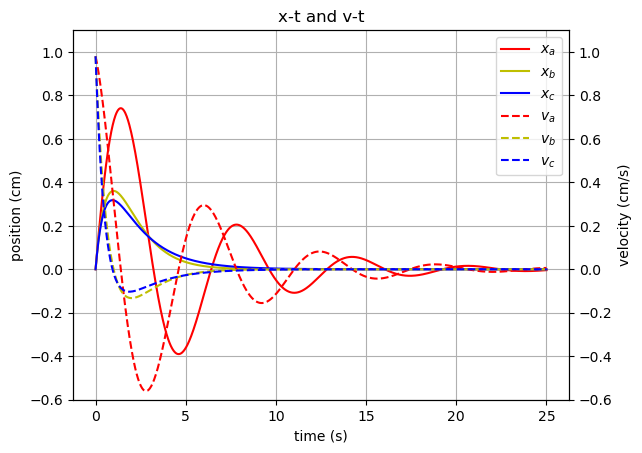

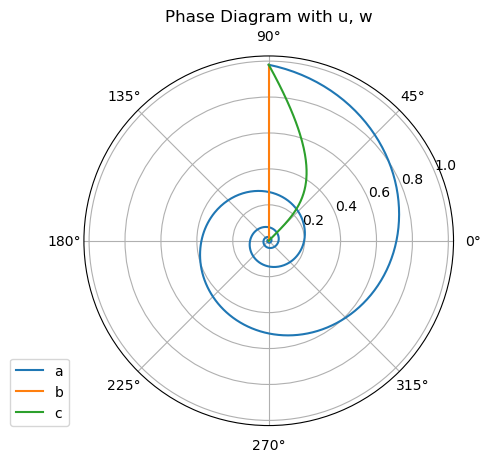

In [3]:
# evaluation function
def f(t,y,omega0,gamma):
    """
    damping system
    """
    yn=np.zeros(np.size(y))
    yn[0] = y[1]
    yn[1] = -2*gamma*y[1]-omega0**2*y[0]
    return yn

def phase_trans(stat,omega0,gamma):
    """
    Change x, v into u, w for phase diagram in polar coordination.
    stat: array of x, v
    return: array of theta, r
    """
    phase = np.zeros(np.size(stat))
    if omega0 >= gamma:
        u = np.sqrt(omega0**2-gamma**2)*stat[0,:]
    else:
        u = np.sqrt(gamma**2-omega0**2)*stat[0,:]
    w = gamma*stat[0,:]+stat[1,:]
    r = np.sqrt(u**2+w**2)
    theta = np.arctan2(w,u) # arctan2 can decide quadrants.
    phase = np.vstack((theta,r))
    return phase


y0 = np.array([0,np.sqrt(0.96)])
t_span = (0,25)
t = np.linspace(t_span[0],t_span[1],1001)
omega0 = 1
gamma_a = 0.2
gamma_b = 1.0
gamma_c = 1.2

sol_a = mysolver.solve_ivp(f, t_span, y0, "RK4", t, (omega0, gamma_a))
sol_b = mysolver.solve_ivp(f, t_span, y0, "RK4", t, (omega0, gamma_b))
sol_c = mysolver.solve_ivp(f, t_span, y0, "RK4", t, (omega0, gamma_c))
phase_a = phase_trans(sol_a, omega0, gamma_a)
phase_b = phase_trans(sol_b, omega0, gamma_b)
phase_c = phase_trans(sol_c, omega0, gamma_c)


fig = plt.figure(1)
ax1 = fig.add_subplot(111) # axes for x(t)
ln1 = ax1.plot(t, sol_a[0,:], "r-", label="$x_a$")
ln2 = ax1.plot(t, sol_b[0,:], "y-", label="$x_b$")
ln3 = ax1.plot(t, sol_c[0,:], "b-", label="$x_c$")
ax2 = ax1.twinx() #axes for v(t) with same x-axis (time).
ln4 = ax2.plot(t, sol_a[1,:], "r--", label="$v_a$")
ln5 = ax2.plot(t, sol_b[1,:], "y--", label="$v_b$")
ln6 = ax2.plot(t, sol_c[1,:], "b--", label="$v_c$")

# Make x and v in one legend.
lns = ln1+ln2+ln3+ln4+ln5+ln6 # ln1 is list
labs = [l.get_label() for l in lns] # Get label of each curve.
ax1.legend(lns,labs)
ax1.set_xlabel("time (s)")
ax1.set_ylabel("position (cm)")
ax2.set_ylabel("velocity (cm/s)")
ax1.set_ylim((-0.6,1.1))
ax2.set_ylim((-0.6,1.1))
ax1.grid()
plt.title("x-t and v-t")


plt.figure(2)
plt.polar(phase_a[0,:], phase_a[1,:], label = "a")
plt.polar(phase_b[0,:], phase_b[1,:], label = "b")
plt.polar(phase_c[0,:], phase_c[1,:], label = "c")
plt.title("Phase Diagram with u, w")
plt.legend(loc = [-0.2,0])
plt.show()



# Problem 2

Energy loss of 1(a)

Text(0.5, 1.0, 'Energy Loss rate by time')

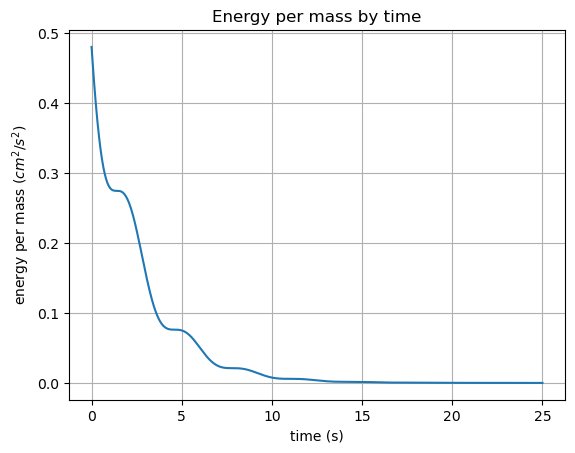

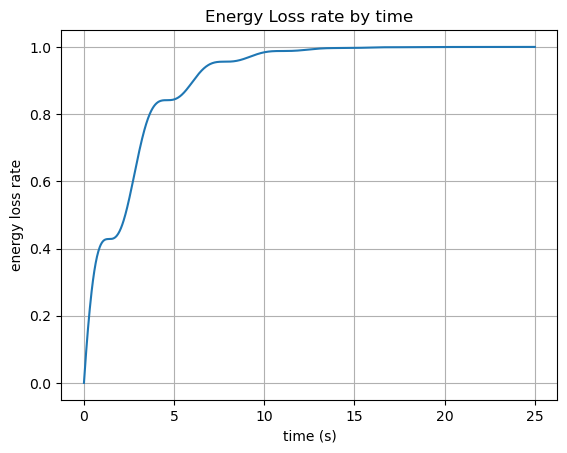

In [4]:
Em = 0.5*sol_a[1,:]**2+0.5*omega0**2*sol_a[0,:]**2
E0 = Em[0]
rate = (E0-Em)/E0
plt.figure(1)
plt.plot(t,Em)
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("energy per mass ($cm^2/s^2$)")
plt.title("Energy per mass by time")

plt.figure(2)
plt.plot(t,rate)
plt.grid()
plt.xlabel("time (s)")
plt.ylabel("energy loss rate")
plt.title("Energy Loss rate by time")

# Problem 3
$m\ddot{x}+\lambda\dot{x}+kx=F_0 \cos{\omega_f t},\ k=m=1$

Analytical amplitude: $\frac{F_0}{m\sqrt{(\omega_0^2-\omega_f^2)^2+(2\gamma\omega_f)^2}}$

Resonance: $\omega_R = \sqrt{\omega_0^2-2\gamma^2}$

''

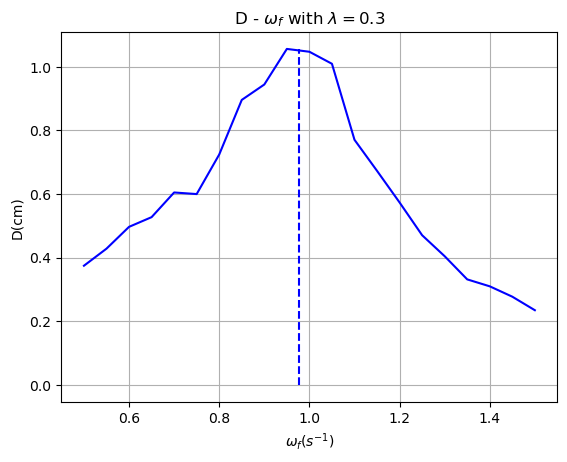

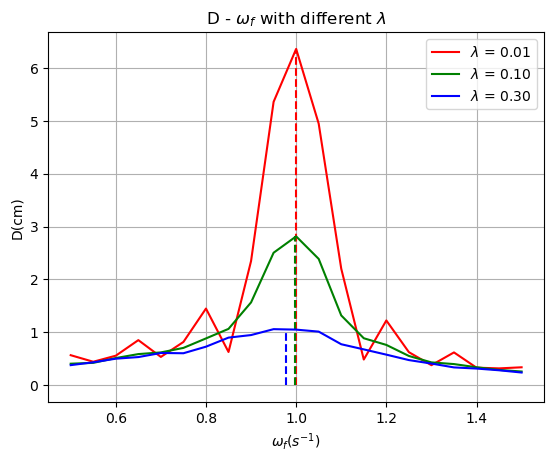

In [12]:
# evaluation function
def ff(t,y,omega0,gamma,F0,omegaf):
    """
    damping system
    """
    yn=np.zeros(np.size(y))
    yn[0] = y[1]
    yn[1] = -2*gamma*y[1]-omega0**2*y[0]+F0*np.cos(omegaf*t)
    return yn

k=1
m=1
omega0 = np.sqrt(k/m)
F0_m = 0.5/m
l_list = np.array([0.01,0.1,0.3])
gamma_list = l_list/2/m
omegaf_list = np.arange(0.5,1.5+0.05,0.05)
y0 = np.array([0,0])
t_span = (0,50)
t = np.linspace(t_span[0],t_span[1],1001)
t_i = np.where(t==40)[0][0]  # index
c = ["r", "g", "b"]

for i, l in enumerate(l_list):
    D_list = []
    for omegaf in omegaf_list:
        sol = mysolver.solve_ivp(ff, t_span, y0, "RK4", t, (omega0, gamma_list[i],F0_m, omegaf))
        x = sol[0,t_i:]
        D = np.mean(np.abs(x))
        D_list.append(D)
    
    omega_R = np.sqrt(omega0**2-2*gamma_list[i]**2)
    D_list = np.array(D_list)
    
    plt.figure(1)
    plt.plot(omegaf_list, D_list, color = c[i], label = "$\lambda$ = %.2f" %(l))
    plt.plot([omega_R,omega_R],[0,np.max(D_list)], "--", color = c[i])

    if i == 2:
        plt.figure(2)
        plt.plot(omegaf_list, D_list, color = c[i], label = "$\lambda$ = %.2f" %(l))
        plt.plot([omega_R,omega_R],[0,np.max(D_list)], "--", color = c[i])
        plt.grid()
        plt.xlabel("$\omega_f(s^{-1})$")
        plt.ylabel("D(cm)")
        plt.title("D - $\omega_f$ with $\lambda=0.3$")

        

plt.figure(1)
plt.legend()
plt.grid()
plt.xlabel("$\omega_f(s^{-1})$")
plt.ylabel("D(cm)")
plt.title("D - $\omega_f$ with different $\lambda$")



# Problem 4
$L\ddot{q}+R\dot{q}+\frac{1}{C}q=E_0\sin\omega t$

$L=C=E_0=1,\ R=0.8,\ \omega=0.7$

Text(0.5, 1.0, 'D-$\\omega$')

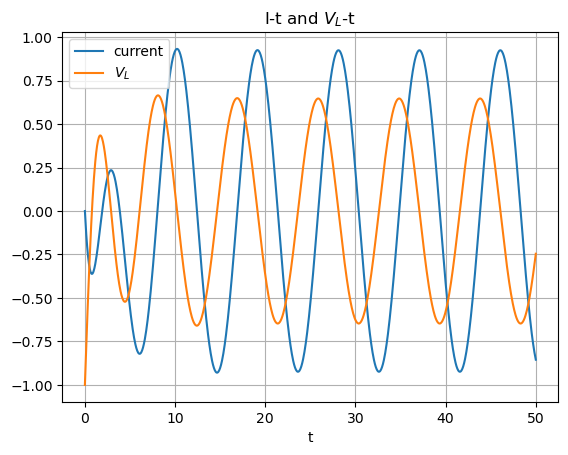

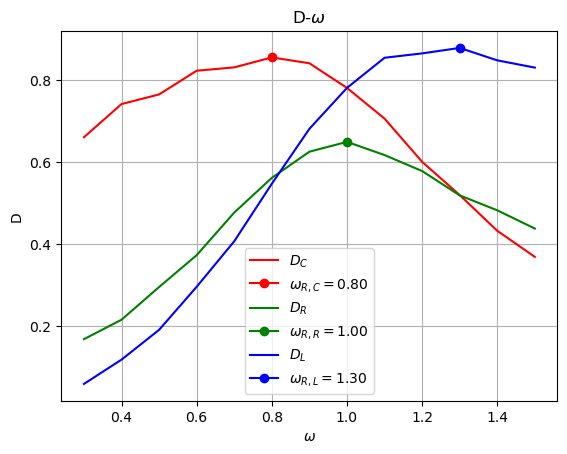

In [40]:
def RLC(t,y,L,R,C,E0,omega):
    """
    RLC
    """
    yn=np.zeros(np.size(y))
    yn[0] = y[1]
    yn[1] = -R/L*y[1]-1/L/C*y[0]+E0/L*np.sin(omega*t)
    return yn

y0 = np.array([1,0])
t_span = (0,50)
t = np.linspace(t_span[0],t_span[1],1001)
L=C=E0=1
R=0.8
omega=0.7

sol = mysolver.solve_ivp(RLC, t_span, y0, "RK4", t, (L,R,C,E0,omega))
V_L = E0*np.sin(omega*t) - 1/C*sol[0,:] - R*sol[1,:]
plt.figure(1)
plt.plot(t,sol[1,:], label="current")
plt.plot(t,V_L, label="$V_L$")
plt.grid()
plt.xlabel("t")
plt.legend()
plt.title("I-t and $V_L$-t")


t_span = (0,100)
t = np.linspace(t_span[0],t_span[1],1001)
omega_list = np.arange(0.3,1.6,0.1)
t_i = np.where(t==80)[0][0]  # index
D_C_list=[]
D_R_list = []
D_L_list = []
for i,omega in enumerate(omega_list):
    sol = mysolver.solve_ivp(RLC, t_span, y0, "RK4", t, (L,R,C,E0,omega))
    V_R = R*sol[1,t_i:]
    V_C = 1/C*sol[0,t_i:]
    V_L = E0*np.sin(omega*t)[t_i:] - V_R - V_C
    D_C_list.append(np.mean(np.abs(V_C)))
    D_L_list.append(np.mean(np.abs(V_L)))
    D_R_list.append(np.mean(np.abs(V_R)))

D_C_list = np.array(D_C_list)
D_L_list = np.array(D_L_list)
D_R_list = np.array(D_R_list)


D = [D_C_list, D_R_list, D_L_list]
colors = ["r", "g", "b"]
labels = ["C", "R", "L"]
plt.figure(2)
for i in range(len(D)):
    plt.plot(omega_list, D[i], color=colors[i], label="$D_%s$" %(labels[i]))
    n = np.where(D[i]==np.max(D[i]))[0][0]
    plt.plot(omega_list[n], (D[i])[n], marker="o", color=colors[i],label="$\omega_{R,%s}=%.2f$" %(labels[i],omega_list[n]))

plt.grid()
plt.legend()
plt.xlabel("$\omega$")
plt.ylabel("D")
plt.title("D-$\omega$")


